In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
df = pd.read_csv(
    "C:/Users/ap5176/Data/quantata/data/2022-08-29-20-22-27.tsv",
    sep="\t"
)
df.head()

,Symbol,ClosingDay,NextDay,SharePrice,ClosingDayAfter1Q,NextDayAfter1Q,SharePriceAfter1Q,ShareCount,MarketCapital,NetWorth,...,GrossOperatingMargin,NetProfitMargin,ROCRatio,IncomeGrowth1Q,IncomeGrowth1Y,RevenueGrowth1Q,RevenueGrowth1Y,AssetsGrowth1Q,AssetsGrowth1Y,SharePriceGrowth
0,095570.KS,2021-12-31,2022-01-05,5320.000000,2022-03-31,2022-04-01,6190.0,44767800,2.381647e+11,3.639947e+11,...,0.065052,0.036560,0.025540,21.670266,-20.586358,0.279583,0.177524,0.008994,-0.146789,0.163534
1,095570.KS,2021-09-30,2021-10-01,5554.347656,2021-12-31,2022-01-05,5320.0,44767800,2.486559e+11,3.639947e+11,...,0.065052,0.036560,0.025540,21.670266,-20.586358,0.279583,0.177524,0.008994,-0.146789,-0.042192
2,282330.KS,2021-12-31,2022-01-05,142000.000000,2022-03-31,2022-04-01,174500.0,17275000,2.453050e+12,7.825517e+11,...,0.022285,0.015358,0.023770,-0.271353,0.203173,-0.029104,0.097050,0.033034,0.094978,0.228873
3,027410.KS,2021-12-31,2022-01-05,5290.000000,2022-03-31,2022-04-01,5320.0,95708800,5.062996e+11,1.552663e+12,...,0.010569,-0.054871,0.000687,-1.314457,1.405717,1.066975,0.339350,-0.014350,0.195041,0.005671
4,006840.KS,2021-12-31,2022-01-05,19750.000000,2022-03-31,2022-04-01,21950.0,13045500,2.576486e+11,5.742398e+11,...,-0.056586,-0.028238,-0.018162,-0.090780,-0.269456,0.008343,0.209056,-0.002690,0.095529,0.111392


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  1250 non-null   object 
 1   ClosingDay              1250 non-null   object 
 2   NextDay                 1250 non-null   object 
 3   SharePrice              1250 non-null   float64
 4   ClosingDayAfter1Q       1250 non-null   object 
 5   NextDayAfter1Q          1250 non-null   object 
 6   SharePriceAfter1Q       1250 non-null   float64
 7   ShareCount              1250 non-null   int64  
 8   MarketCapital           1250 non-null   float64
 9   NetWorth                1250 non-null   float64
 10  NetIncome               1250 non-null   float64
 11  TotalAssets             1250 non-null   float64
 12  TotalRevenue            1250 non-null   float64
 13  TotalCash               1248 non-null   float64
 14  TotalLiabilities        1250 non-null   

In [4]:
df.isna().sum()

Symbol                    0
ClosingDay                0
NextDay                   0
SharePrice                0
ClosingDayAfter1Q         0
NextDayAfter1Q            0
SharePriceAfter1Q         0
ShareCount                0
MarketCapital             0
NetWorth                  0
NetIncome                 0
TotalAssets               0
TotalRevenue              0
TotalCash                 2
TotalLiabilities          0
GrossProfit               0
OperatingCashflow         6
OperatingIncome           0
EnterpriseValue           2
EarningsBeforeInterest    0
CurrentLiabilities        0
EmployedCapital           0
NetIncome1Y               0
NetIncomeBefore1Q         0
NetIncomeBefore1Y         0
TotalRevenue1Y            0
TotalRevenueBefore1Q      0
TotalRevenueBefore1Y      0
TotalAssets1Y             0
TotalAssetsBefore1Q       0
TotalAssetsBefore1Y       0
PERatio                   0
PBRatio                   0
PSRatio                   0
PCFRatio                  6
EVEBITRatio         

In [5]:
df = df.replace((np.inf, -np.inf), np.nan).dropna().reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1170 non-null   int64  
 1   Symbol                  1170 non-null   object 
 2   ClosingDay              1170 non-null   object 
 3   NextDay                 1170 non-null   object 
 4   SharePrice              1170 non-null   float64
 5   ClosingDayAfter1Q       1170 non-null   object 
 6   NextDayAfter1Q          1170 non-null   object 
 7   SharePriceAfter1Q       1170 non-null   float64
 8   ShareCount              1170 non-null   int64  
 9   MarketCapital           1170 non-null   float64
 10  NetWorth                1170 non-null   float64
 11  NetIncome               1170 non-null   float64
 12  TotalAssets             1170 non-null   float64
 13  TotalRevenue            1170 non-null   float64
 14  TotalCash               1170 non-null   

In [6]:
df.columns

Index(['index', 'Symbol', 'ClosingDay', 'NextDay', 'SharePrice',
       'ClosingDayAfter1Q', 'NextDayAfter1Q', 'SharePriceAfter1Q',
       'ShareCount', 'MarketCapital', 'NetWorth', 'NetIncome', 'TotalAssets',
       'TotalRevenue', 'TotalCash', 'TotalLiabilities', 'GrossProfit',
       'OperatingCashflow', 'OperatingIncome', 'EnterpriseValue',
       'EarningsBeforeInterest', 'CurrentLiabilities', 'EmployedCapital',
       'NetIncome1Y', 'NetIncomeBefore1Q', 'NetIncomeBefore1Y',
       'TotalRevenue1Y', 'TotalRevenueBefore1Q', 'TotalRevenueBefore1Y',
       'TotalAssets1Y', 'TotalAssetsBefore1Q', 'TotalAssetsBefore1Y',
       'PERatio', 'PBRatio', 'PSRatio', 'PCFRatio', 'EVEBITRatio',
       'EVSalesRatio', 'ROERatio', 'ROARatio', 'GPARatio', 'LARatio',
       'TurnoverRatio', 'GrossMargin', 'GrossOperatingMargin',
       'NetProfitMargin', 'ROCRatio', 'IncomeGrowth1Q', 'IncomeGrowth1Y',
       'RevenueGrowth1Q', 'RevenueGrowth1Y', 'AssetsGrowth1Q',
       'AssetsGrowth1Y', 'SharePric

In [7]:
features = [
    "PERatio", "PBRatio", "PSRatio", "PCFRatio", "EVEBITRatio",
    "EVSalesRatio", "ROERatio", "ROARatio", "GPARatio", "LARatio",
    "TurnoverRatio", "GrossMargin", "GrossOperatingMargin",
    "NetProfitMargin", "ROCRatio", "IncomeGrowth1Q", "IncomeGrowth1Y",
    "RevenueGrowth1Q", "RevenueGrowth1Y", "AssetsGrowth1Q",
    "AssetsGrowth1Y"
]

In [8]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[features])
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled,
    df["SharePriceGrowth"],
    test_size=0.25,
    shuffle=True,
)

In [9]:
model_dtr = DecisionTreeRegressor()
model_dtr.fit(x_train, y_train)
y_pred_dtr = model_dtr.predict(x_test)
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_dtr))
r2_dtr = r2_score(y_test, y_pred_dtr)
print(rmse_dtr, r2_dtr)

0.24344197377893276 -1.1511362149396236


In [10]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(rmse_lr, r2_lr)

0.16557519149548464 0.004898175018037798


In [11]:
model_rfr = RandomForestRegressor()
model_rfr.fit(x_train, y_train)
y_pred_rfr = model_rfr.predict(x_test)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
r2_rfr = r2_score(y_test, y_pred_rfr)
print(rmse_rfr, r2_rfr)

0.1826494879290746 -0.21091569619599815


In [12]:
for importance, feature in sorted(zip(model_dtr.feature_importances_, features), reverse=True):
    print(feature, importance)

PBRatio 0.16665721615871815
PSRatio 0.1156211973307427
ROARatio 0.11463921708373673
PERatio 0.10745472777349357
PCFRatio 0.06219118565736479
RevenueGrowth1Y 0.054397425861005905
AssetsGrowth1Q 0.05354693679955526
EVSalesRatio 0.04540231605923121
GPARatio 0.03743102969838956
ROCRatio 0.03561872288405102
IncomeGrowth1Y 0.03406846358575247
EVEBITRatio 0.029543625890861472
RevenueGrowth1Q 0.023351481172294786
AssetsGrowth1Y 0.023156027856539283
IncomeGrowth1Q 0.022363986888280545
LARatio 0.01913772305345058
GrossMargin 0.017023281749843813
ROERatio 0.01086954942849773
NetProfitMargin 0.01012615849246922
GrossOperatingMargin 0.009005808995136273
TurnoverRatio 0.008393917580584895


In [13]:
for importance, feature in sorted(zip(abs(model_lr.coef_), features), reverse=True):
    print(feature, importance)

ROARatio 1.0490920247743054
NetProfitMargin 0.9000676785004753
ROERatio 0.7567359751612637
PBRatio 0.6465125135285819
ROCRatio 0.6080812037999399
PSRatio 0.2355479286426612
PCFRatio 0.1736692573789844
IncomeGrowth1Q 0.16957300499104858
PERatio 0.16800576819745922
EVEBITRatio 0.16110891775784597
AssetsGrowth1Q 0.13323474241319241
RevenueGrowth1Y 0.13149024331232298
EVSalesRatio 0.1161695983820629
LARatio 0.07515304400103157
IncomeGrowth1Y 0.07119222154388467
GPARatio 0.05742418307573775
RevenueGrowth1Q 0.039388384094671755
GrossOperatingMargin 0.03186051074744252
GrossMargin 0.030400164410845892
TurnoverRatio 0.025243274864579824
AssetsGrowth1Y 0.013006971055617177


In [14]:
for importance, feature in sorted(zip(model_rfr.feature_importances_, features), reverse=True):
    print(feature, importance)

ROARatio 0.09489830911075069
PBRatio 0.09252874859782732
PSRatio 0.08108559676391197
EVSalesRatio 0.07894013271776872
PERatio 0.062375856229792075
PCFRatio 0.062013628363704
EVEBITRatio 0.053610577711912126
IncomeGrowth1Y 0.0470534280032132
AssetsGrowth1Q 0.04562722926785713
ROERatio 0.04532665507130567
RevenueGrowth1Y 0.045150336411562006
LARatio 0.04384528247471715
AssetsGrowth1Y 0.03315276939659867
RevenueGrowth1Q 0.030912147530723452
IncomeGrowth1Q 0.030289455862665456
GrossMargin 0.02800491530947903
ROCRatio 0.027307496281175667
GPARatio 0.026660189682006202
TurnoverRatio 0.024610876616012904
GrossOperatingMargin 0.023653381831967496
NetProfitMargin 0.022952986765049137


In [15]:
features_4p = ["PERatio", "PBRatio", "PSRatio", "PCFRatio"]

In [16]:
min_max_scaler_4p = MinMaxScaler()
x_scaled_4p = min_max_scaler_4p.fit_transform(df[features_4p])
x_train_4p, x_test_4p, y_train_4p, y_test_4p = train_test_split(
    x_scaled_4p,
    df["SharePriceGrowth"],
    test_size=0.25,
    shuffle=True,
)

In [17]:
model_rfr_4p = RandomForestRegressor()
model_rfr_4p.fit(x_train_4p, y_train_4p)
y_pred_rfr_4p = model_rfr_4p.predict(x_test_4p)
rmse_rfr_4p = np.sqrt(mean_squared_error(y_test_4p, y_pred_rfr_4p))
r2_rfr_4p = r2_score(y_test_4p, y_pred_rfr_4p)
print(rmse_rfr_4p, r2_rfr_4p)

0.2146070834288704 -0.04445857000473796


In [18]:
for importance, feature in sorted(zip(model_rfr_4p.feature_importances_, features_4p), reverse=True):
    print(feature, importance)

PERatio 0.2852408769951667
PSRatio 0.253298153202402
PBRatio 0.24912642526318285
PCFRatio 0.2123345445392483


<AxesSubplot:>

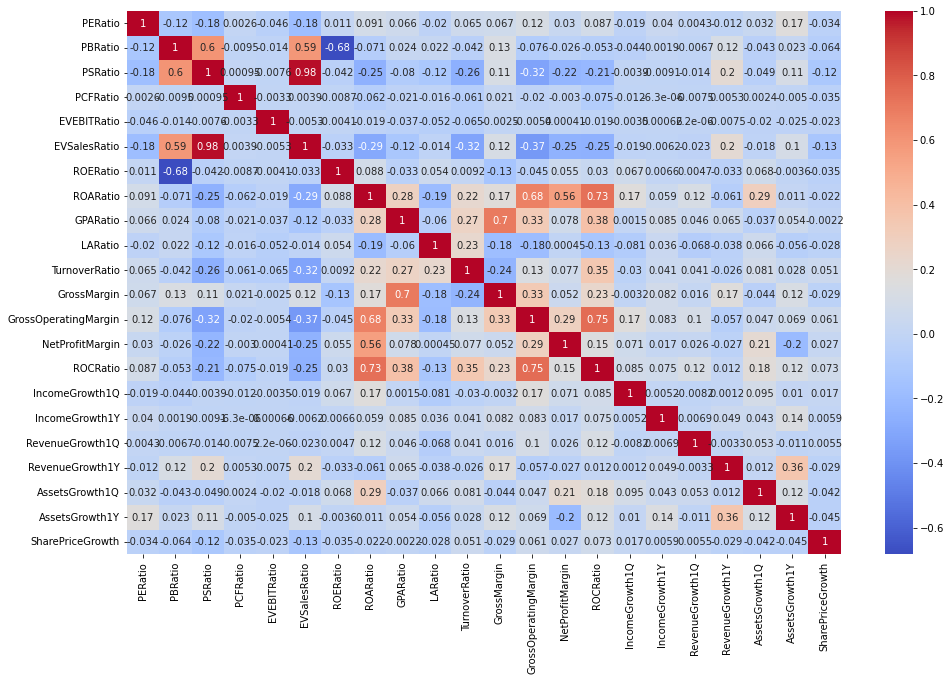

In [19]:
plt.figure(figsize=(16, 10))
sns.heatmap(df[features + ["SharePriceGrowth"]].corr(), annot=True, cmap="coolwarm")

In [20]:
features_low_corr = [
    "PERatio", "PBRatio", "PSRatio", "PCFRatio", "EVEBITRatio",
    "EVSalesRatio", "GPARatio", "LARatio",
    "IncomeGrowth1Q", "IncomeGrowth1Y",
    "RevenueGrowth1Y",
    "AssetsGrowth1Y"
]

In [21]:
min_max_scaler_low_corr = MinMaxScaler()
x_scaled_low_corr = min_max_scaler_low_corr.fit_transform(df[features_low_corr])
x_train_low_corr, x_test_low_corr, y_train_low_corr, y_test_low_corr = train_test_split(
    x_scaled_low_corr,
    df["SharePriceGrowth"],
    test_size=0.25,
    shuffle=True,
)

In [22]:
model_rfr_low_corr = RandomForestRegressor()
model_rfr_low_corr.fit(x_train_low_corr, y_train_low_corr)
y_pred_rfr_low_corr = model_rfr_low_corr.predict(x_test_low_corr)
rmse_rfr_low_corr = np.sqrt(mean_squared_error(y_test_low_corr, y_pred_rfr_low_corr))
r2_rfr_low_corr = r2_score(y_test_low_corr, y_pred_rfr_low_corr)
print(rmse_rfr_low_corr, r2_rfr_low_corr)

0.1909654216536335 -0.11242099305366726


In [23]:
for importance, feature in sorted(zip(model_rfr_low_corr.feature_importances_, features_low_corr), reverse=True):
    print(feature, importance)

PBRatio 0.11564099594421506
IncomeGrowth1Y 0.10728970486196658
PERatio 0.10332185919133521
EVEBITRatio 0.10232637986251682
PSRatio 0.09067816283019431
PCFRatio 0.08891875362854866
EVSalesRatio 0.08827141094749645
RevenueGrowth1Y 0.06946653499697884
AssetsGrowth1Y 0.06815180341185362
LARatio 0.06336322645031876
IncomeGrowth1Q 0.05466224174537372
GPARatio 0.047908926129202084


In [24]:
y_categorized = (df["SharePriceGrowth"] > 0) * 1

In [25]:
x_train_categorized, x_test_categorized, y_train_categorized, y_test_categorized = train_test_split(
    x_scaled,
    y_categorized,
    test_size=0.25,
    shuffle=True,
)

In [26]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(x_train_categorized, y_train_categorized)
y_pred_dtc = model_dtc.predict(x_test_categorized)
acc_dtc = accuracy_score(y_test_categorized, y_pred_dtc)
roc_auc_dtc = roc_auc_score(y_test_categorized, y_pred_dtc)
f1_dtc = f1_score(y_test_categorized, y_pred_dtc)
print(acc_dtc, roc_auc_dtc, f1_dtc)

0.47440273037542663 0.4431148748159057 0.30630630630630634


In [27]:
model_rfc = RandomForestClassifier()
model_rfc.fit(x_train_categorized, y_train_categorized)
y_pred_rfc = model_rfc.predict(x_test_categorized)
acc_rfc = accuracy_score(y_test_categorized, y_pred_rfc)
roc_auc_rfc = roc_auc_score(y_test_categorized, y_pred_rfc)
f1_rfc = f1_score(y_test_categorized, y_pred_rfc)
print(acc_rfc, roc_auc_rfc, f1_rfc)

0.5221843003412969 0.47101830422890806 0.3069306930693069


In [28]:
model_lrc = LogisticRegression()
model_lrc.fit(x_train_categorized, y_train_categorized)
y_pred_lrc = model_lrc.predict(x_test_categorized)
acc_lrc = accuracy_score(y_test_categorized, y_pred_lrc)
roc_auc_lrc = roc_auc_score(y_test_categorized, y_pred_lrc)
f1_lrc = f1_score(y_test_categorized, y_pred_lrc)
print(acc_lrc, roc_auc_lrc, f1_lrc)

0.6689419795221843 0.5 0.0


In [29]:
conf_mat = confusion_matrix(y_test_categorized, y_pred_lrc)
conf_mat

array([[196,   0],
       [ 97,   0]], dtype=int64)

In [30]:
model_vc = VotingClassifier([("DTC", DecisionTreeClassifier()), ("RFC", RandomForestClassifier()), ("LRC", LogisticRegression())])
model_vc.fit(x_train_categorized, y_train_categorized)
y_pred_vc = model_vc.predict(x_test_categorized)
acc_vc = accuracy_score(y_test_categorized, y_pred_vc)
roc_auc_vc = roc_auc_score(y_test_categorized, y_pred_vc)
f1_vc = f1_score(y_test_categorized, y_pred_vc)
print(acc_vc, roc_auc_vc, f1_vc)

0.552901023890785 0.4809593940669051 0.28415300546448086


In [31]:
x_train_categorized_4p, x_test_categorized_4p, y_train_categorized_4p, y_test_categorized_4p = train_test_split(
    x_scaled_4p,
    y_categorized,
    test_size=0.25,
    shuffle=True,
)

In [32]:
model_dtc_4p = DecisionTreeClassifier()
model_dtc_4p.fit(x_train_categorized_4p, y_train_categorized_4p)
y_pred_dtc_4p = model_dtc_4p.predict(x_test_categorized_4p)
acc_dtc_4p = accuracy_score(y_test_categorized_4p, y_pred_dtc_4p)
roc_auc_dtc_4p = roc_auc_score(y_test_categorized_4p, y_pred_dtc_4p)
f1_dtc_4p = f1_score(y_test_categorized_4p, y_pred_dtc_4p)
print(acc_dtc_4p, roc_auc_dtc_4p, f1_dtc_4p)

0.590443686006826 0.5694275582573455 0.4642857142857143
